In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 家電  

## ヘアドライヤー

### 時刻別消費電力量
$$
E_{ Elc, dryer, d, t } =  P_{ Elc, dryer } \times t_{ dryer, d, t } \times 10^{ -3 }
$$

$ E_{ Elc, dryer, d, t } $：日付dの時刻tにおける消費電力量,kWh  
$ P_{ Elc, dryer, oprt } $：使用時の消費電力,W  
$ t_{ dryer, oprt, d, t } $：日付dの時刻tにおける使用時間,h  
$ 10^{ -3 } $：単位換算,Wh -> kWh

In [2]:
def get_E_Elc_dryer_d_t(P_Elc_dryer_rtd, t_dryer_oprt_d_t, number_of_people):
    """時刻別消費電力量を計算する
    
    Parameters
    ----------
    P_Elc_dryer_rtd : float
        定格消費電力, W
        
    t_dryer_oprt_d_t : ndarray(N-dimensional array)
        1年間の全時間の使用時間を格納したND配列, h
        d日t時の使用時間が年開始時から8760個連続して格納されている
    
    number_of_people : int
        世帯人数, 人        
    
    Returns
    ----------
    E_Elc_dryer_d_t : ndarray(N-dimensional array)
        1年間の全時間の消費電力量を格納したND配列, kWh
        d日t時の消費電力量が年開始時から8760個連続して格納されている
    """
    
    P_Elc_dryer_oprt = get_P_Elc_dryer_oprt(P_Elc_dryer_rtd, number_of_people)
    
    E_Elc_dryer_d_t = P_Elc_dryer_oprt * t_dryer_oprt_d_t
    E_Elc_dryer_d_t = E_Elc_dryer_d_t * 10**(-3)
    
    return E_Elc_dryer_d_t

### 動作別の消費電力

#### 使用時の消費電力  
$$
P_{ Elc, dryer } =　
\begin{cases}
0.8974 \times P_{ Elc, dryer, rtd } & ( \mbox{ 4人世帯 } ) \\
0.8974 \times P_{ Elc, dryer, rtd } \times \frac{ 3 }{ 3 } & ( \mbox{ 3人世帯 } ) \\
0.8974 \times P_{ Elc, dryer, rtd } \times \frac{ 2 }{ 3 } & ( \mbox{ 2人世帯 } ) \\
0.8974 \times P_{ Elc, dryer, rtd } \times \frac{ 1 }{ 3 } & ( \mbox{ 1人世帯 } )
\end{cases}
$$

$ P_{ Elc, dryer, rtd } $：定格消費電力,W

In [3]:
def get_P_Elc_dryer_oprt(P_Elc_dryer_rtd, number_of_people):
    """使用時の消費電力を計算する
    
    Parameters
    ----------
    P_Elc_dryer_rtd : float
        定格消費電力, W
        
    number_of_people : int
        世帯人数, 人        
        
    Returns
    ----------
    P_Elc_dryer_oprt : float
        使用時の消費電力, W
    """
    
    if number_of_people == 4:
        P_Elc_dryer_oprt = 0.8974 * P_Elc_dryer_rtd
    elif number_of_people == 3:
        P_Elc_dryer_oprt = 0.8974 * P_Elc_dryer_rtd * 3 / 3
    elif number_of_people == 2:
        P_Elc_dryer_oprt = 0.8974 * P_Elc_dryer_rtd * 2 / 3
    elif number_of_people == 1:
        P_Elc_dryer_oprt = 0.8974 * P_Elc_dryer_rtd * 1 / 3
    else:
        raise ValueError(number_of_people)
        
    return P_Elc_dryer_oprt

## サンプル計算

### 家電スケジュールの読み込み
ここでは、サンプルデータをcsvファイルから読み込む

In [4]:
def import_schedule_1_d_t() -> np.ndarray:
    """家電スケジュールを外部CSVファイルからND配列に読み込む
    
    Returns
    ----------
    E_Elc_tv_led_d_t : ndarray(N-dimensional array)
        1年間の全時間の家電スケジュールを格納したND配列
        d日t時の家電スケジュールが年開始時から8760個連続して格納されている
    """
    
    df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
    ds = df['ヘアドライヤー_4人世帯_使用']
    schedule_1_d_t = ds.values
    return schedule_1_d_t

#### 調理時の消費電力

In [5]:
get_P_Elc_dryer_oprt(1200, 4)

1076.8799999999999

### 時刻別消費電力量

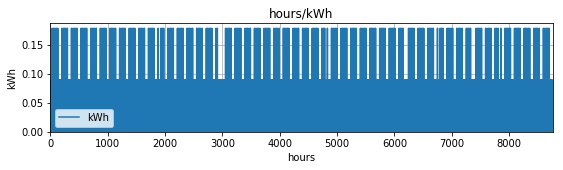

In [6]:
t_dryer_oprt_d_t = import_schedule_1_d_t()

x = np.arange(8760)
y = get_E_Elc_dryer_d_t(1200, t_dryer_oprt_d_t, 4)

plt.figure(figsize=(9,2))
plt.subplot(1,1,1)
plt.plot(x, y, label="kWh")

plt.grid(True)

plt.title("hours/kWh")
plt.xlabel("hours")
plt.ylabel("kWh")

plt.xlim(0,8760)
plt.ylim(0,)

plt.legend()
plt.show()

### 省エネ基準との比較用時刻別消費電力量の書き出し

In [7]:
n = 1

df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
ds = df['ヘアドライヤー_' + str(n) + '人世帯_使用']

dat = get_E_Elc_dryer_d_t(1200, ds, n)

np.savetxt('dryer' + str(n) + '.csv',dat,delimiter=',',fmt = " %s ")

In [8]:
n = 2

df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
ds = df['ヘアドライヤー_' + str(n) + '人世帯_使用']

dat = get_E_Elc_dryer_d_t(1200, ds, n)

np.savetxt('dryer' + str(n) + '.csv',dat,delimiter=',',fmt = " %s ")

In [9]:
n = 3

df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
ds = df['ヘアドライヤー_' + str(n) + '人世帯_使用']

dat = get_E_Elc_dryer_d_t(1200, ds, n)

np.savetxt('dryer' + str(n) + '.csv',dat,delimiter=',',fmt = " %s ")

In [10]:
n = 4

df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
ds = df['ヘアドライヤー_' + str(n) + '人世帯_使用']

dat = get_E_Elc_dryer_d_t(1200, ds, n)

np.savetxt('dryer' + str(n) + '.csv',dat,delimiter=',',fmt = " %s ")